Aim:

Perform descriptive analytics to create a customer profile for each CardioGood Fitness treadmill product line.



Data Variables

# Import all necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"D:\Data\CardioGoodFitness.csv")

In [3]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [5]:
df.shape

(180, 9)

Observation

In dataset total 180 rows and 9 columns

In [6]:
df.describe(include="all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM195,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [7]:
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [8]:
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

Observation:
No null values present

In [9]:
df.duplicated().any()

False

Observation:
No duplicate values are in dataset

# Univariate Analysis

In [74]:
df[df["Product"]== 'TM195'].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,80.0,28.5500,7.221452,18.0,23.0,26.0,33.0,50.0
Education,80.0,15.0375,1.216383,12.0,14.0,16.0,16.0,18.0
Usage,80.0,3.0875,0.782624,2.0,3.0,3.0,4.0,5.0
Fitness,80.0,2.9625,0.664540,1.0,3.0,3.0,3.0,5.0
Income,80.0,46418.0250,9075.783190,29562.0,38658.0,46617.0,53439.0,68220.0
Miles,80.0,82.7875,28.874102,38.0,66.0,85.0,94.0,188.0


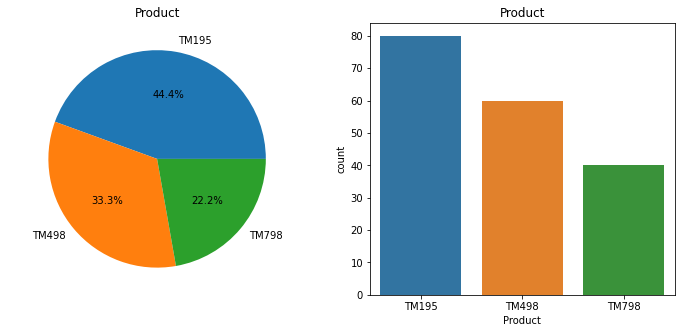

In [10]:
import matplotlib.pyplot as plt
f,ax=plt.subplots(1,2,figsize=(12,5))
df["Product"].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0])
ax[0].set_title("Product")
ax[0].set_ylabel(" ")

sns.countplot("Product", data=df, ax=ax[1])
ax[1].set_title("Product")
plt.show()


There are total 3 products(TM195, TM498, TM798). TM195 having high value counts as compared to other two products.

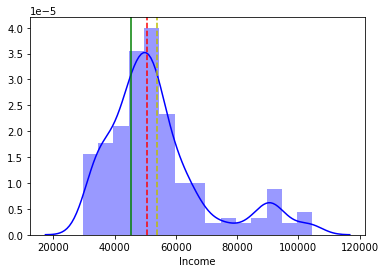

In [11]:
 
x=sns.distplot(df['Income'],color='blue')
x.axvline(df['Income'].mean(), color='y', linestyle='--')
x.axvline(df['Income'].median(), color='r', linestyle='dashed')
x.axvline(df['Income'].mode()[0], color='g', linestyle='solid')



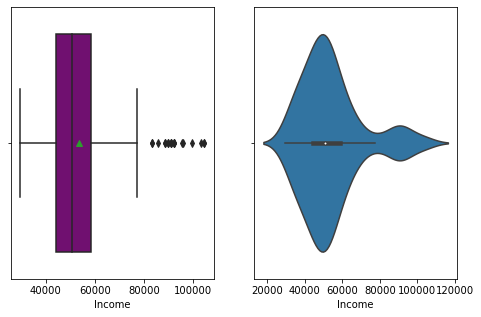

In [12]:
f, ax=plt.subplots(1,2, figsize=(8,5))
sns.boxplot(x=df['Income'], ax=ax[0], showmeans = True, color='purple')
sns.violinplot(x=df['Income'], ax=ax[1], showmeans=True)
plt.show()

Some outliers are present in variable

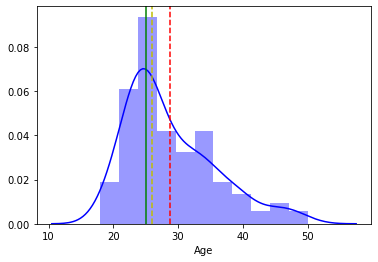

In [13]:
age=sns.distplot(df["Age"], color='blue')
age.axvline(df["Age"].mean(), color='r', linestyle='--')
age.axvline(df["Age"].median(), color='y', linestyle='dashed')
age.axvline(df["Age"].mode()[0],color='g', linestyle="solid")

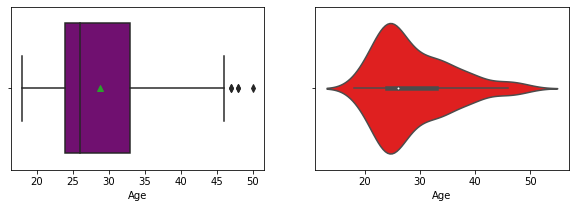

In [14]:
f, ax=plt.subplots(1, 2, figsize=(10, 3))
sns.boxplot(df["Age"], ax=ax[0], showmeans=True, color='purple')
sns.violinplot(df["Age"], ax=ax[1], showmeans=True, color="red")

In [15]:
df["Miles"].value_counts()

85     27
95     12
66     10
75     10
47      9
106     9
113     8
94      8
53      7
100     7
56      6
64      6
180     6
200     6
127     5
160     5
42      4
150     4
120     3
38      3
170     3
74      3
103     3
132     2
141     2
300     1
280     1
21      1
240     1
80      1
212     1
360     1
112     1
140     1
169     1
188     1
260     1
Name: Miles, dtype: int64

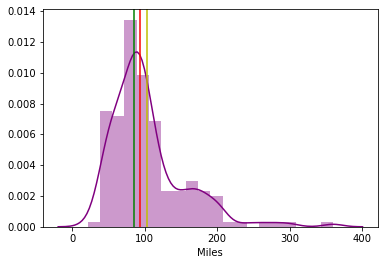

In [16]:
mile=sns.distplot(df["Miles"], color='purple')
mile.axvline(df["Miles"].mean(), color='y')
mile.axvline(df["Miles"].median(), color='r')
mile.axvline(df["Miles"].mode()[0], color='g')

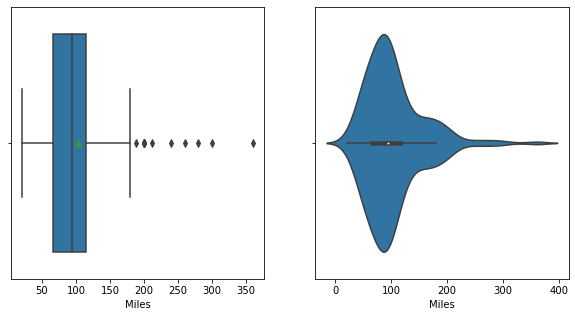

In [17]:
f, ax=plt.subplots(1, 2, figsize=(10,5))
sns.boxplot(df["Miles"], ax=ax[0], showmeans=True)
sns.violinplot(df["Miles"], ax=ax[1], showmeans=True)

In [18]:
df["Gender"].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

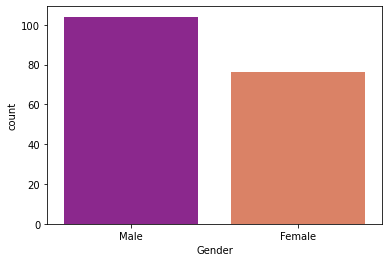

In [19]:
sns.countplot(df["Gender"], palette="plasma")

In [20]:
df["MaritalStatus"].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

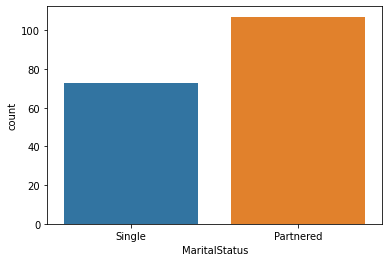

In [21]:
sns.countplot(df["MaritalStatus"])

In [22]:
df["Education"].value_counts()

16    85
14    55
18    23
15     5
13     5
21     3
12     3
20     1
Name: Education, dtype: int64

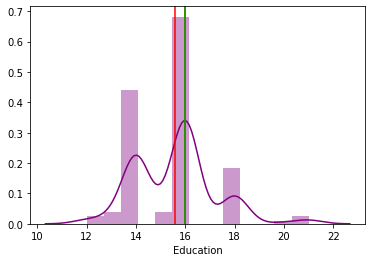

In [23]:
edu=sns.distplot(df["Education"], color='purple')
edu.axvline(df["Education"].mean(), color="r")
edu.axvline(df["Education"].median(), color='y')
edu.axvline(df["Education"].mode()[0], color='g')

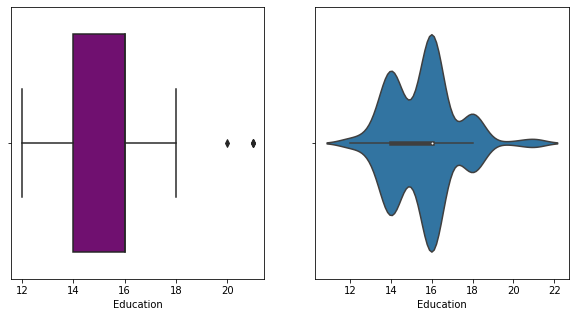

In [24]:
f, ax=plt.subplots(1,2, figsize=(10, 5))
sns.boxplot(df["Education"], ax=ax[0], color='purple')
sns.violinplot(df["Education"], ax=ax[1])

In [25]:
df["Fitness"].value_counts()

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

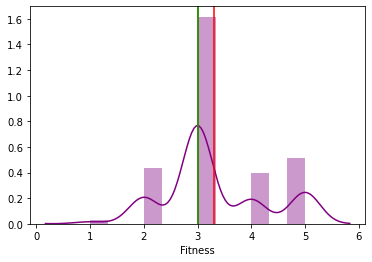

In [26]:
fit=sns.distplot(df["Fitness"], color="purple")
fit.axvline(df["Fitness"].mean(), color='r')
fit.axvline(df["Fitness"].median(), color='y')
fit.axvline(df["Fitness"].mode()[0], color='g')

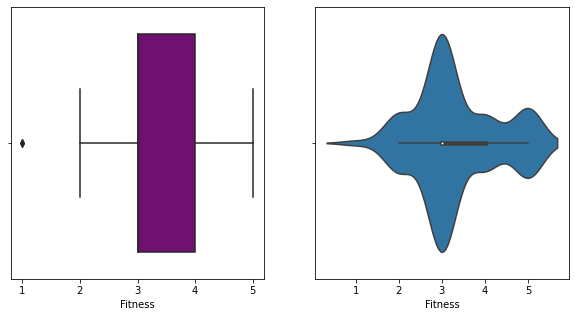

In [27]:
f, ax=plt.subplots(1,2,figsize=(10,5))
sns.boxplot(df["Fitness"], ax=ax[0], color='purple')
sns.violinplot(df["Fitness"], ax=ax[1])

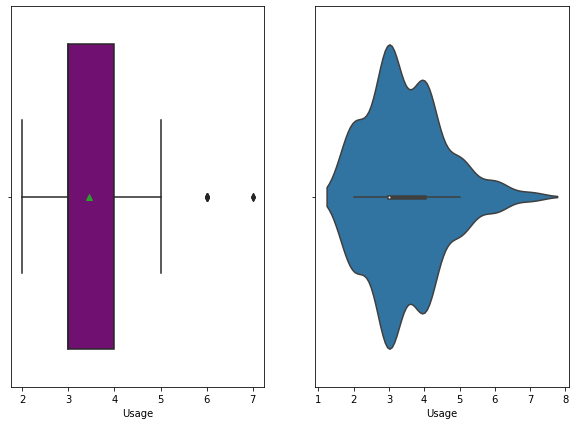

In [28]:
f, ax=plt.subplots(1,2,figsize=(10,7))
sns.boxplot(df["Usage"], ax=ax[0], showmeans=True, color='purple')
sns.violinplot(df["Usage"], ax=ax[1], showmeans=True)

# Bivariate analysis

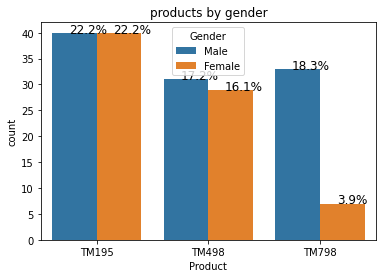

In [59]:
ax=sns.countplot(df["Product"], hue="Gender", data=df)
length = len(df["Product"])
plt.title("products by gender")
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/length) # percentage of each class of the category
    x=p.get_x() + p.get_width()/2 - 0.05
    y=p.get_y() + p.get_height()
                                  
    ax.annotate(percentage,(x,y), size=12)

Text(0.5, 1.0, 'Marital status wise product')

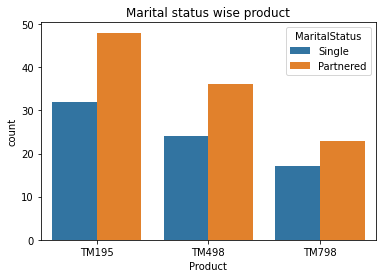

In [60]:
sns.countplot(df["Product"], hue="MaritalStatus", data=df)
plt.title("Marital status wise product")

In [61]:
df.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


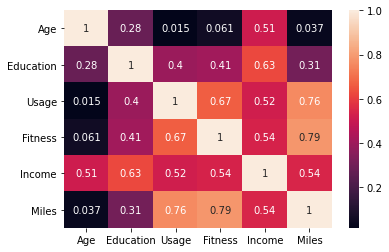

In [62]:
sns.heatmap(df.corr(), annot=True)

In [63]:
corr_pair=df.corr().unstack()

In [64]:
corr_pair

Age        Age          1.000000
           Education    0.280496
           Usage        0.015064
           Fitness      0.061105
           Income       0.513414
           Miles        0.036618
Education  Age          0.280496
           Education    1.000000
           Usage        0.395155
           Fitness      0.410581
           Income       0.625827
           Miles        0.307284
Usage      Age          0.015064
           Education    0.395155
           Usage        1.000000
           Fitness      0.668606
           Income       0.519537
           Miles        0.759130
Fitness    Age          0.061105
           Education    0.410581
           Usage        0.668606
           Fitness      1.000000
           Income       0.535005
           Miles        0.785702
Income     Age          0.513414
           Education    0.625827
           Usage        0.519537
           Fitness      0.535005
           Income       1.000000
           Miles        0.543473
Miles     

In [65]:
print(corr_pair[abs(corr_pair>0.5)])

Age        Age          1.000000
           Income       0.513414
Education  Education    1.000000
           Income       0.625827
Usage      Usage        1.000000
           Fitness      0.668606
           Income       0.519537
           Miles        0.759130
Fitness    Usage        0.668606
           Fitness      1.000000
           Income       0.535005
           Miles        0.785702
Income     Age          0.513414
           Education    0.625827
           Usage        0.519537
           Fitness      0.535005
           Income       1.000000
           Miles        0.543473
Miles      Usage        0.759130
           Fitness      0.785702
           Income       0.543473
           Miles        1.000000
dtype: float64


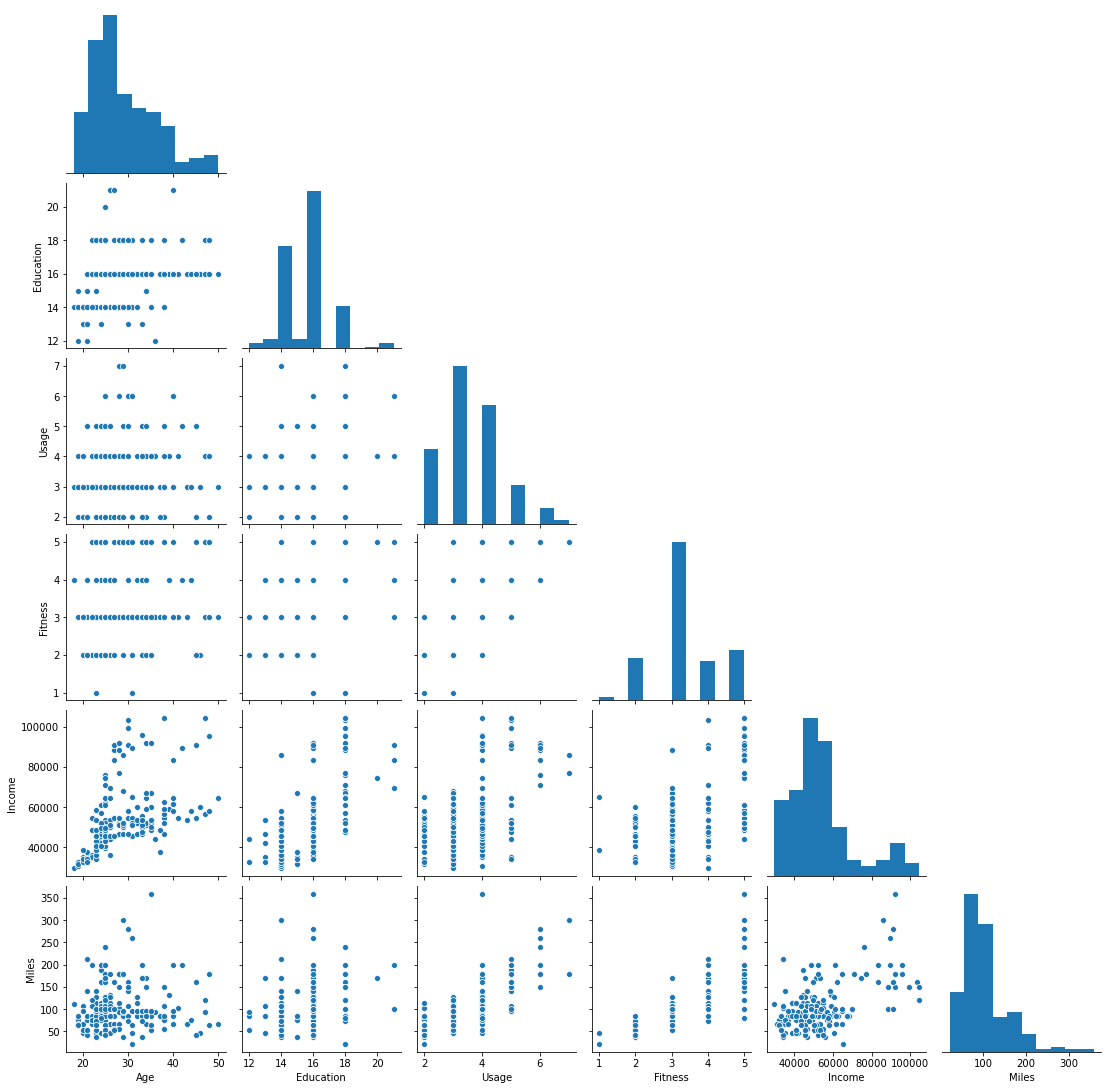

In [66]:
sns.pairplot(data=df, corner=True)

In [67]:
#bivariate analysis of gender for all variables

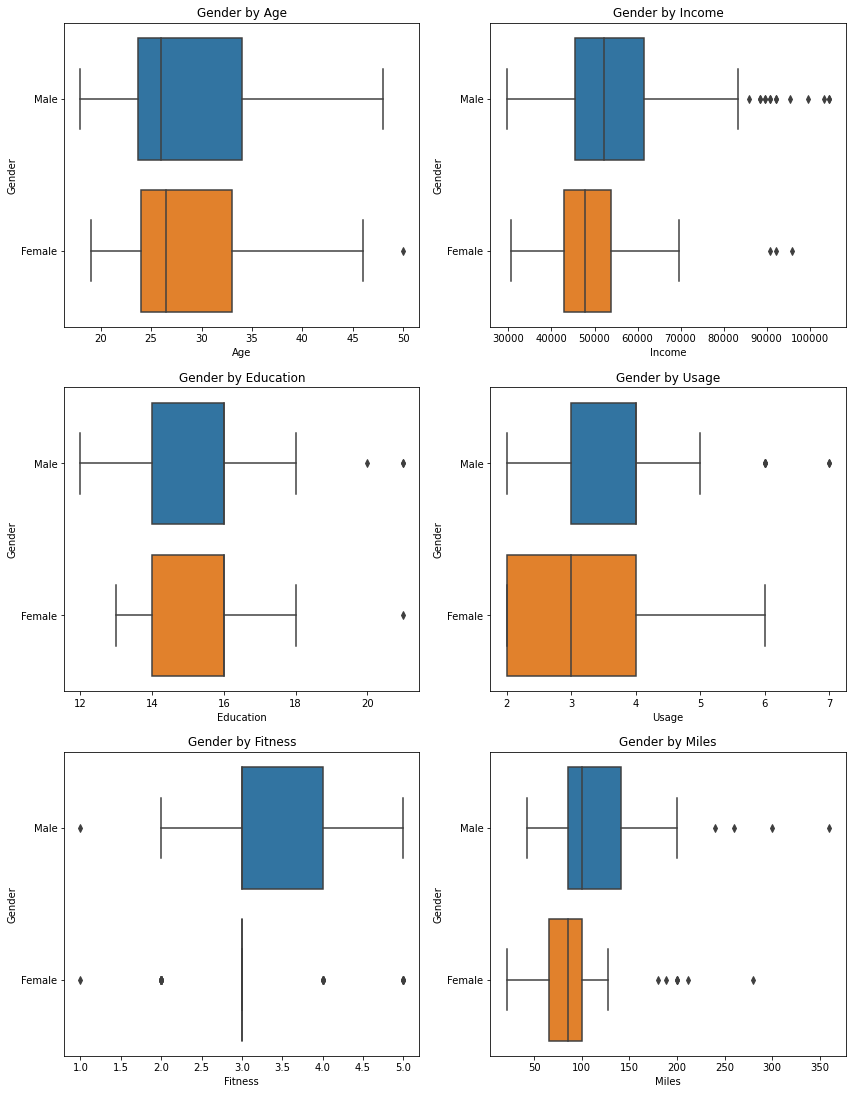

In [68]:
 
fig, axes=plt.subplots(3,2,figsize=(14,19))
col_lis=['Age','Income','Education','Usage','Fitness','Miles']
for i in range(len(col_lis)):
    row=i//2
    col=i%2
    ax=axes[row, col]
    sns.boxplot(df[col_lis[i]], df["Gender"],ax=ax).set(title='Gender by' +" "+col_lis[i])

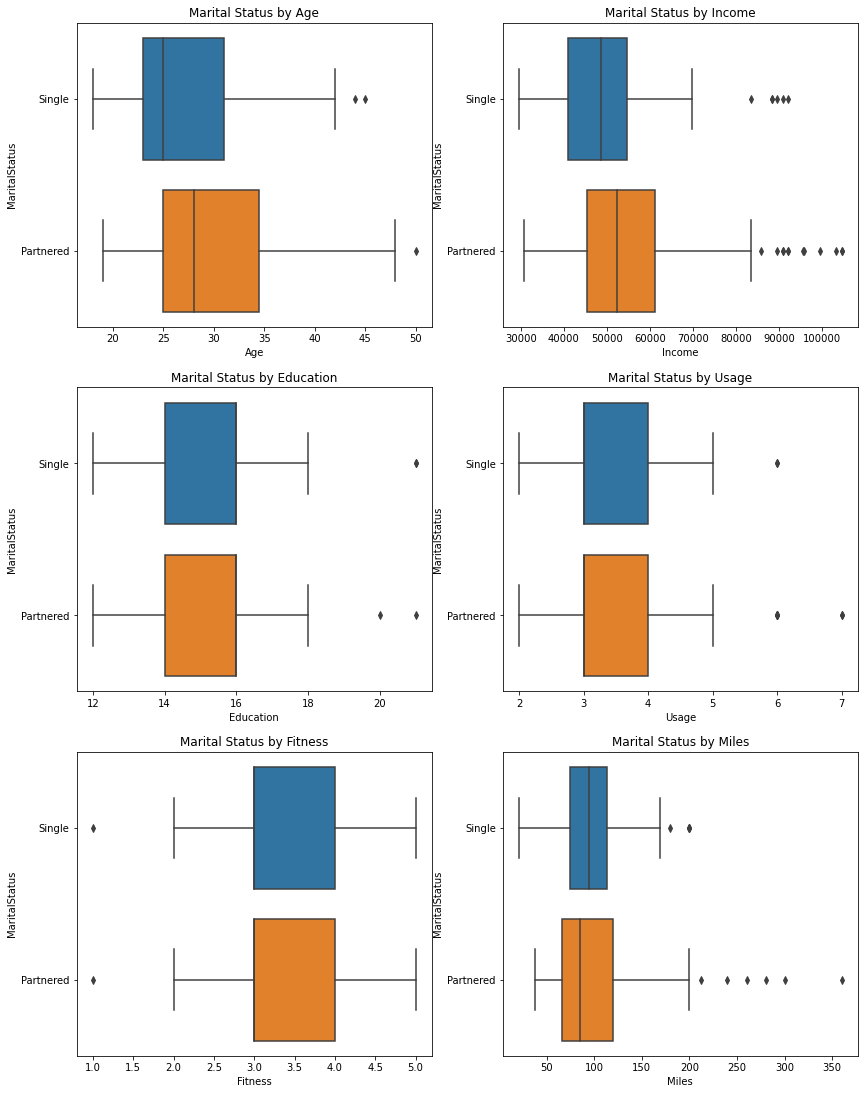

In [69]:
fig, axes=plt.subplots(3,2, figsize=(14,19))
col=['Product', 'Age', 'Gender', 'Education','Usage', 'Fitness', 'Income', 'Miles']
for i in range(len(col_lis)):
    row=i//2
    col=i%2
    ax=axes[row, col]
    sns.boxplot(df[col_lis[i]], df["MaritalStatus"],ax=ax).set(title='Marital Status by' +" "+col_lis[i])

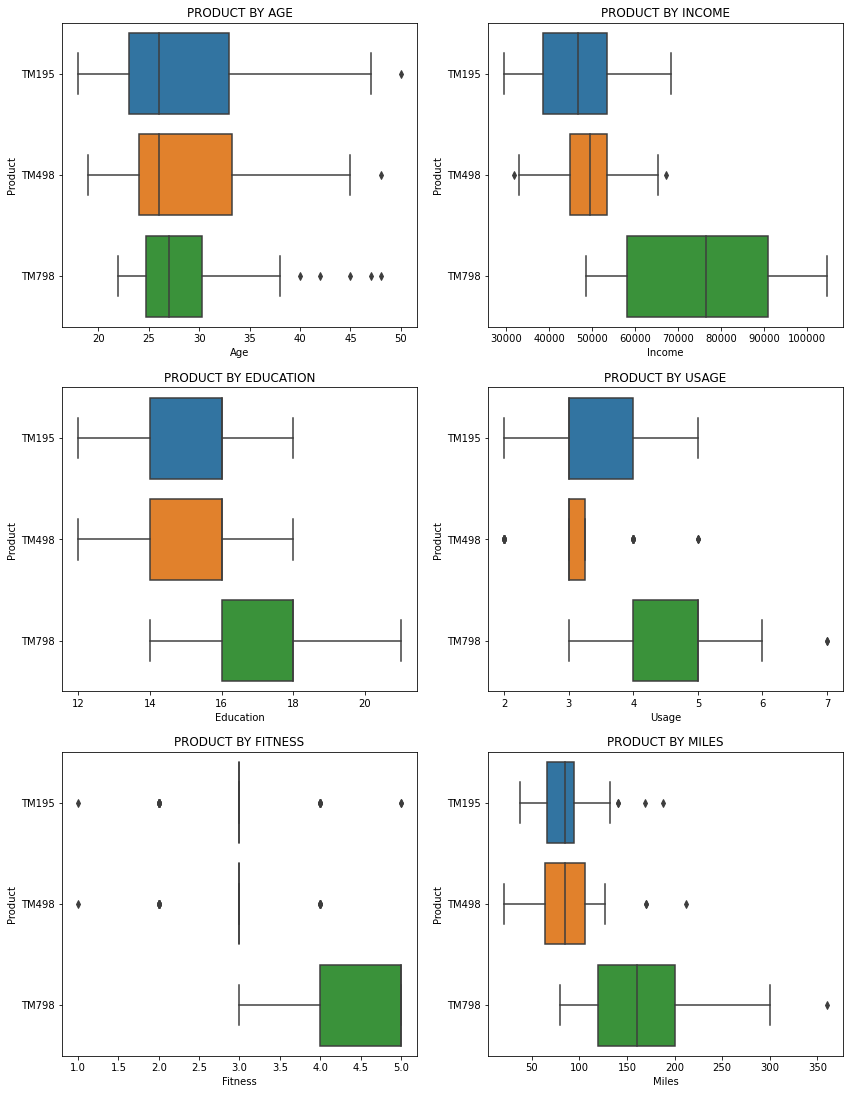

In [70]:
fig, axes=plt.subplots(3,2,figsize=(14,19))
list1_col=['Age','Income','Education','Usage','Fitness','Miles' ]
#instead of writing  boxplot 6 times using for loop
for i in range(len(list1_col)):
    row=i//2
    col=i%2
    ax=axes[row,col]
    
    sns.boxplot(df[list1_col[i]],df['Product'],ax=ax).set(title='PRODUCT BY ' + list1_col[i].upper()  )

[Text(0.5, 1.0, 'Education by income')]

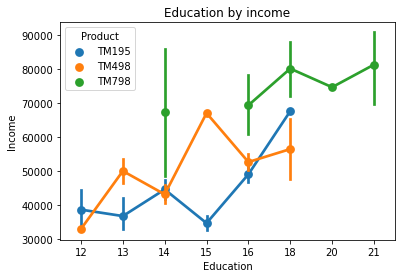

In [71]:
sns.pointplot(x=df["Education"], y=df["Income"], hue='Product',data=df).set(title="Education by income")

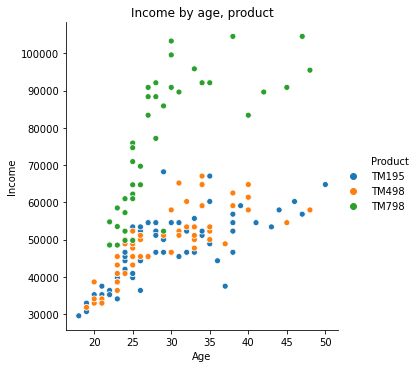

In [72]:
sns.relplot(x="Age", y="Income", hue="Product", data=df).set(title="Income by age, product")

# Observation

# Customer profiles for all models

### TM195